**Title : 오늘 호주는 하루종일 맑음**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 필수 라이브러리

In [4]:
!pip install mglearn

from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

sns.set_theme()
# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None) # 화면에 모든 열 출력하기

# 데이터 불러오기

In [6]:
data = pd.read_csv('/content/drive/MyDrive/데이터/rain.csv')

## 데이터 사본 생성

In [11]:
# 사본을 생성하였지만 딱히 쓸 일이 없었다
train = data.copy()

## 데이터 살펴보기
- 비예측과 관련된 데이터

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
# 시작부터 꼴보기 싫은 NaN이 있다. 망할 NaN
train.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [8]:
train.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Date: 관측일자 (일반적으로 날짜 형식, 예: 'YYYY-MM-DD').

Location: 기상 관측 위치 또는 지점의 이름.

MinTemp: 최저 기온 (일반적으로 섭씨 온도 단위).

MaxTemp: 최고 기온 (일반적으로 섭씨 온도 단위).

Rainfall: 하루 동안의 강우량 (일반적으로 밀리미터 단위).

Evaporation: 하루 동안의 증발량 (일반적으로 밀리미터 단위).

Sunshine: 하루 동안의 일조량 또는 햇빛 시간 (시간 단위).

WindGustDir: 바람 돌풍의 방향 (예: 'N'은 북쪽).

WindGustSpeed: 바람 돌풍의 속도 (일반적으로 킬로미터/시간 또는 노트 단위).

WindDir9am: 오전 9시의 바람 방향.

WindDir3pm: 오후 3시의 바람 방향.

WindSpeed9am: 오전 9시의 바람 속도 (일반적으로 킬로미터/시간 또는 노트 단위).

WindSpeed3pm: 오후 3시의 바람 속도 (일반적으로 킬로미터/시간 또는 노트 단위).

Humidity9am: 오전 9시의 상대 습도 (백분율로 나타냄).

Humidity3pm: 오후 3시의 상대 습도 (백분율로 나타냄).

Pressure9am: 오전 9시의 기압 (헥톴파스칼 또는 밀리바르 단위).

Pressure3pm: 오후 3시의 기압 (헥톴파스칼 또는 밀리바르 단위).

Cloud9am: 오전 9시의 구름 양 (백분율 또는 구름 양에 따라 다름).

Cloud3pm: 오후 3시의 구름 양 (백분율 또는 구름 양에 따라 다름).

Temp9am: 오전 9시의 기온 (일반적으로 섭씨 온도 단위).

Temp3pm: 오후 3시의 기온 (일반적으로 섭씨 온도 단위).

## 데이터 전처리
- 필요없는 컬럼 삭제
- 결측치 채우기(=삭제)

In [12]:
# 결측치는 보기 싫으니 데이터셋에서 Out ★
train = train.dropna(axis=0)

In [13]:
# 건방지게 Yes, No로 되어있던 컬럼을 각각 1, 0로 변환
col = ['RainToday','RainTomorrow']
mapping_dict = {'Yes': 1, 'No': 0}

for i in col:
  train[i] = train[i].map(mapping_dict)

In [14]:
# 날짜가 아니던 날짜 데이터를 날짜 형식으로 변☆신
train['Date'] = pd.to_datetime(train['Date'])

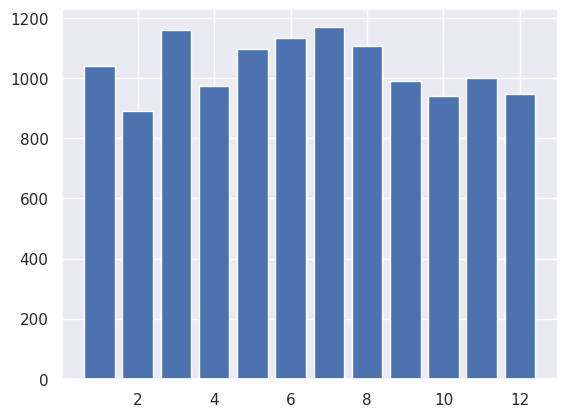

In [12]:
# 월별 비온 횟수 그래프
group_date = train.groupby(train['Date'].dt.month).sum()['RainToday']
plt.bar(group_date.index,group_date)
plt.show()

- 월별로 분석했을때 결과의 차이가 있긴 하지만 미미한 편이다

In [15]:
# 내 데이터셋에서 삭제♬
train.drop('Date',axis=1,inplace=True)

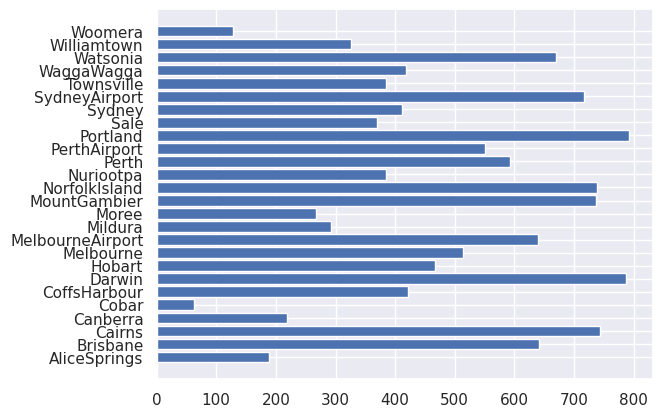

In [14]:
# 지역별 비온 횟수 그래프
group_date = train.groupby('Location').sum()['RainToday']
plt.barh(group_date.index,group_date)
plt.show()

- 지역별로 비온 횟수가 상당히 차이나는 편이다
- 이는 사막의 경우 비가 상대적으로 덜 오기 때문이다

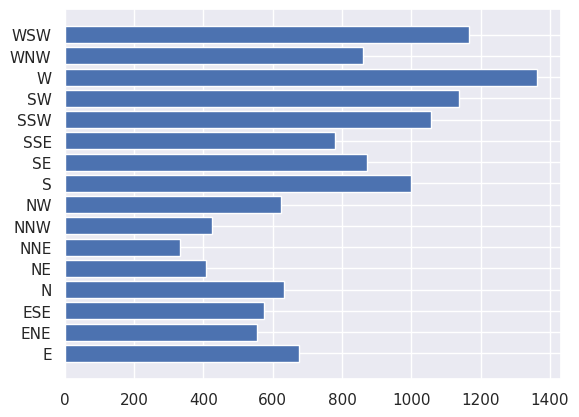

In [15]:
# 바람방향별 비온 횟수 그래프
group_date = train.groupby('WindGustDir').sum()['RainToday']
plt.barh(group_date.index,group_date)
plt.show()

- 강풍 방향의 경우 비온 횟수와의 상관관계가 크다는 걸 알 수 있다
- 특히 서풍이 비를 자주 오게한다

In [16]:
# 원핫 인코딩의 결과보다 라벨 인코딩의 결과값이 더 잘나오기 때문에 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns=['WindGustDir','WindDir9am','WindDir3pm','Location']
train[columns] = label_encoder.fit_transform(columns)

In [17]:
train.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,0,17.9,35.2,0.0,12.0,12.3,3,48.0,2,1,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,0,18.4,28.9,0.0,14.8,13.0,3,37.0,2,1,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,0,19.4,37.6,0.0,10.8,10.6,3,46.0,2,1,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,0,21.9,38.4,0.0,11.4,12.2,3,31.0,2,1,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,0,24.2,41.0,0.0,11.2,8.4,3,35.0,2,1,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


## 시각화를 통한 컬럼 분석


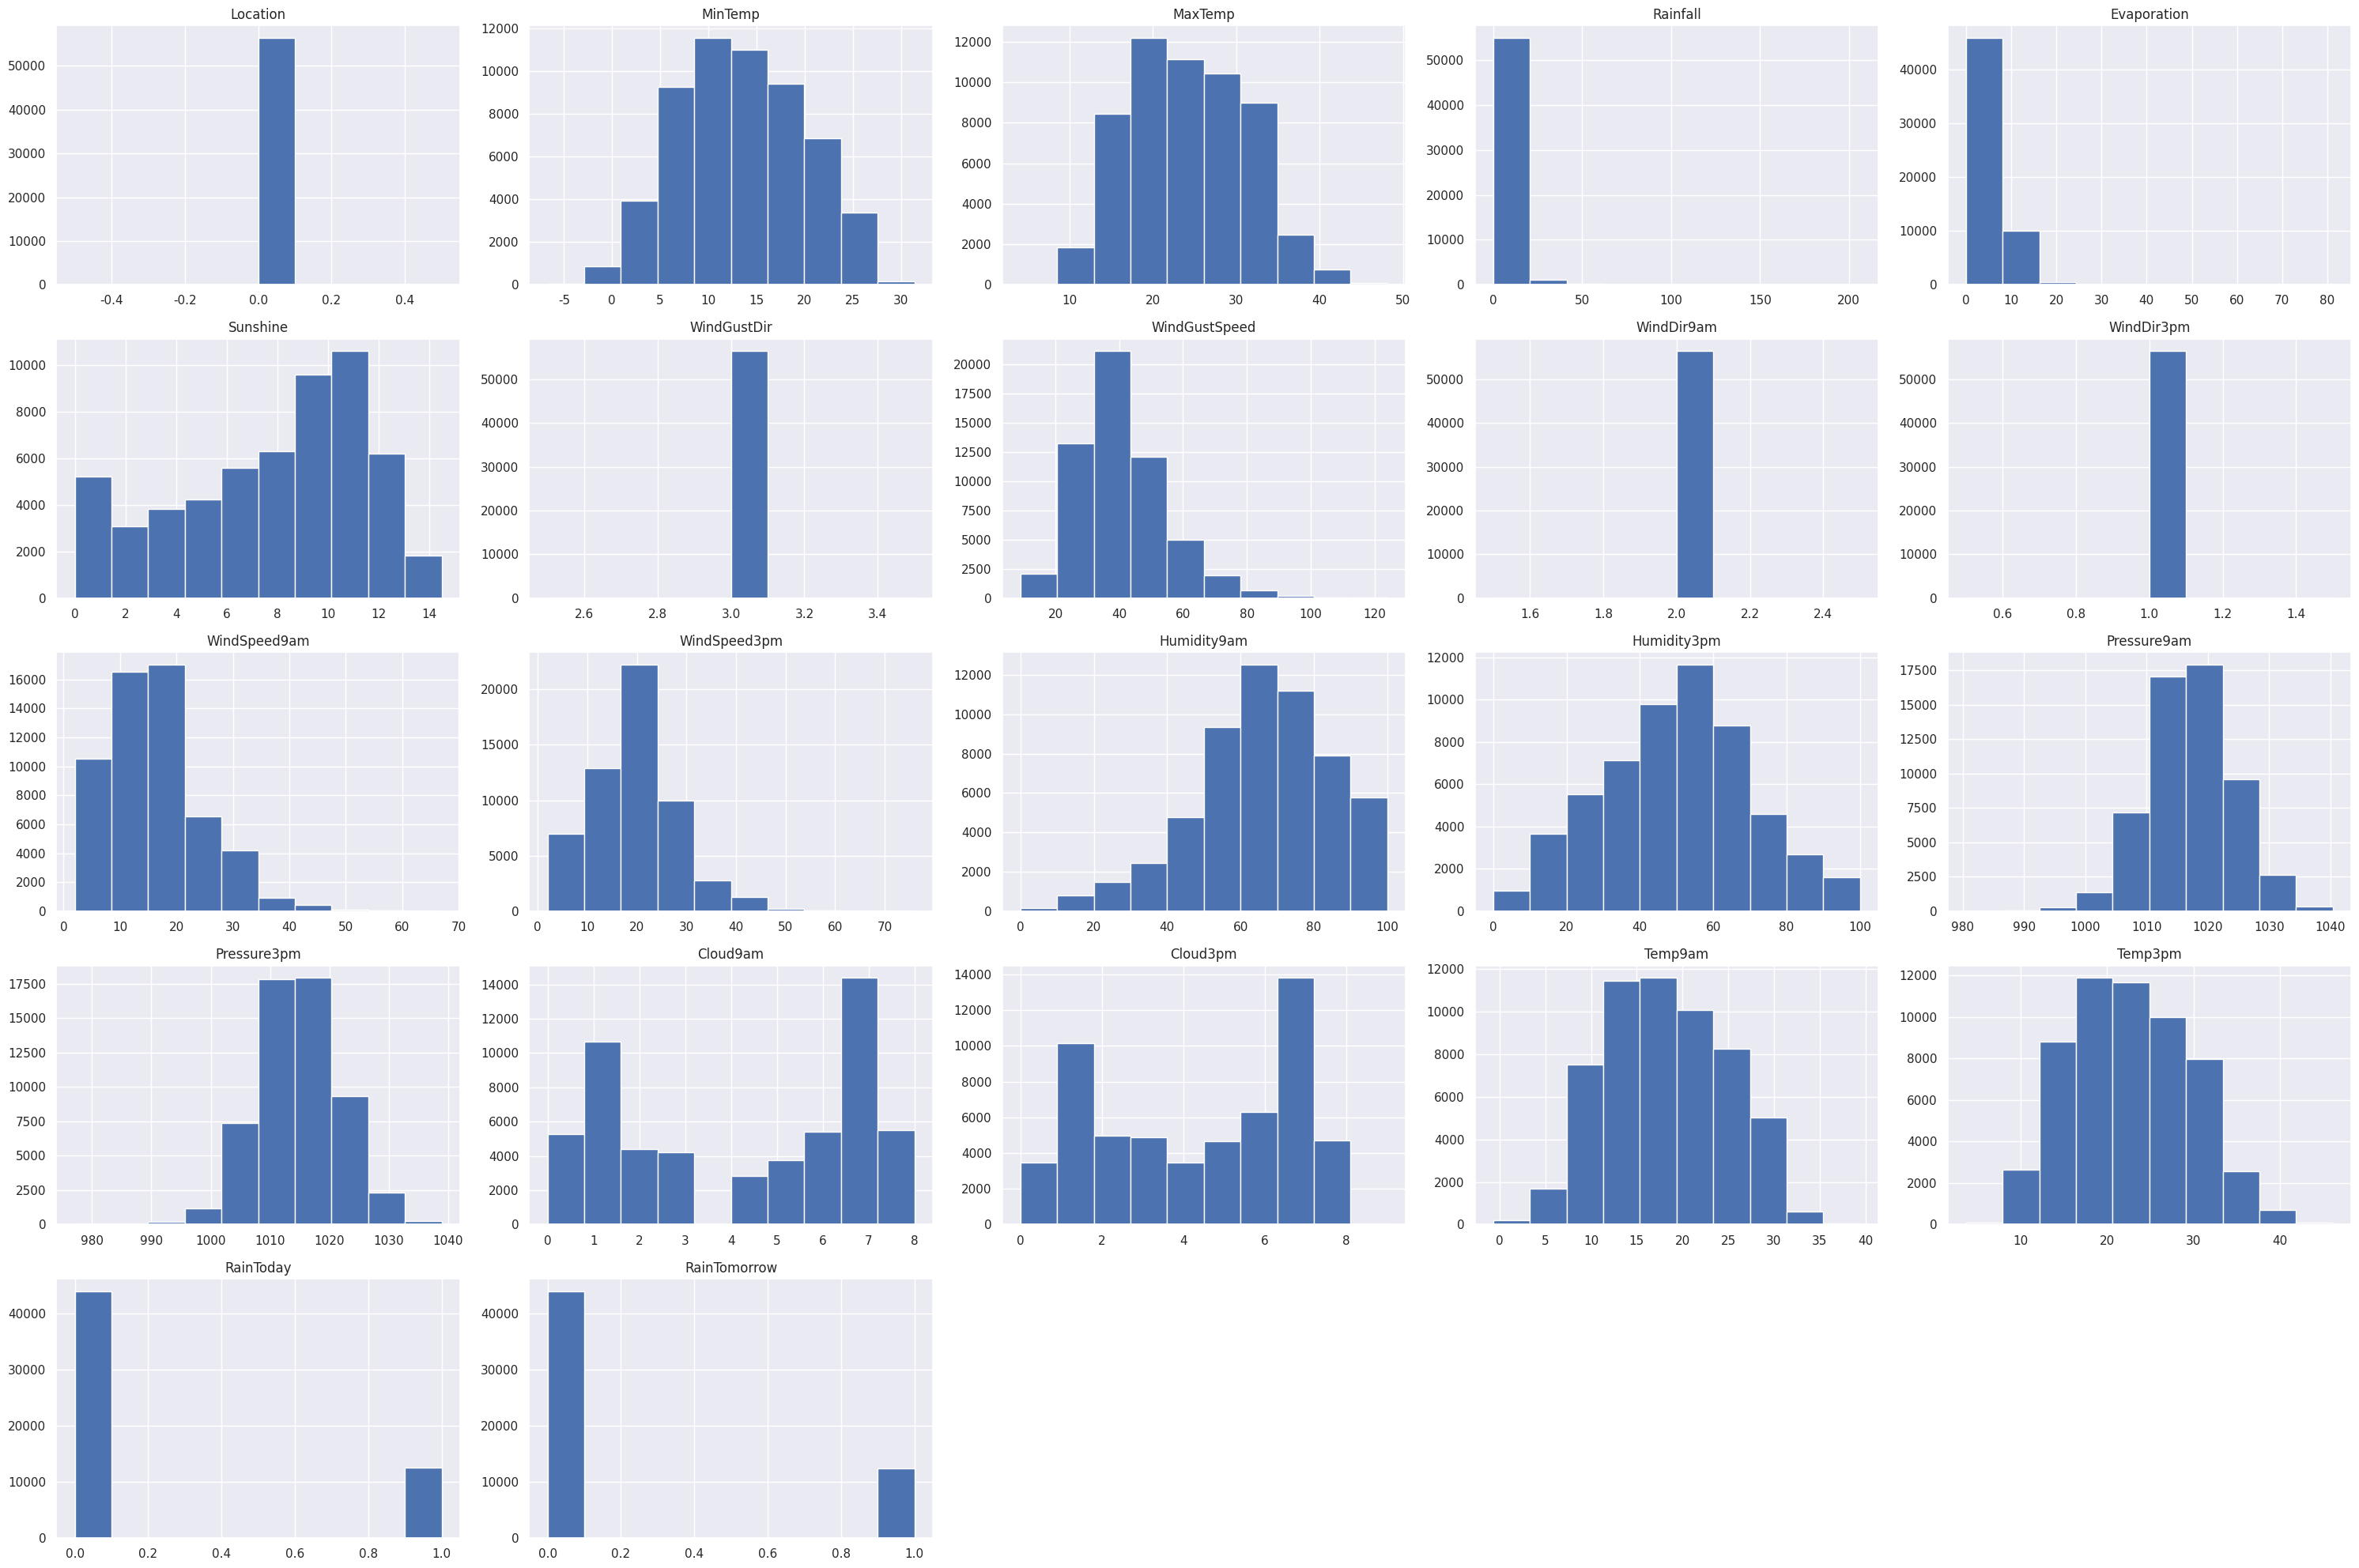

In [18]:
train.hist(figsize=(30,20))
plt.tight_layout()
plt.show()

- 얼핏 봐서는 이상치도 없고 균등해 보인다

In [19]:
# 강우량과 RainToday, RainTommoro를 비교
train.loc[train['Rainfall'] > 0,['Rainfall','RainToday','RainTomorrow']].head(10)

,Rainfall,RainToday,RainTomorrow
6068,4.8,1,0
6071,18.0,1,1
6072,8.6,1,0
6082,0.6,0,1
6083,1.6,1,0
6092,0.6,0,1
6093,26.0,1,1
6094,7.0,1,0
6096,32.6,1,1
6097,1.6,1,0


- Q. Rainfall(=강수량)이 양수값인데 왜 RainToday가 0인가요?
- A. 일정 강수량 이상 관측 될 경우만 비가 온것으로 합니다

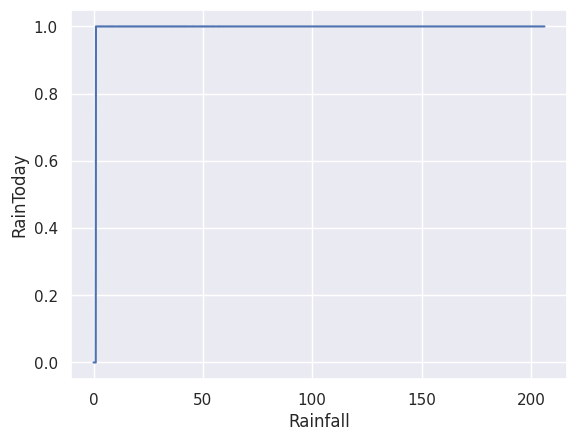

In [20]:
sns.lineplot(x='Rainfall',y='RainToday',data=train)
plt.show()

- 완벽한 직각

## 컬럼별 raintomorrow의 분류 상관관계 시각 그래프

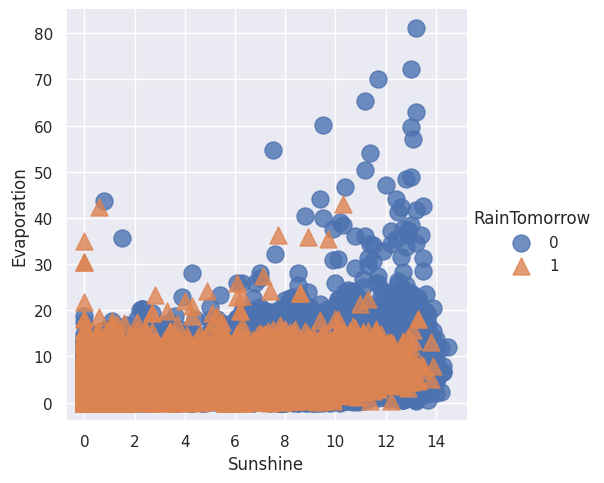

In [21]:
sns.lmplot(x='Sunshine',y='Evaporation',data = train,fit_reg = False,
           scatter_kws={'s':150},
           hue = 'RainTomorrow',
           markers = ['o','^'])
plt.show()

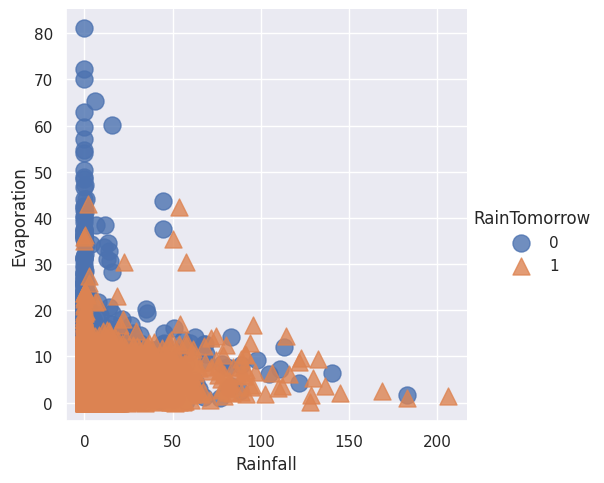

In [22]:
sns.lmplot(x='Rainfall',y='Evaporation',data = train,fit_reg = False,
           scatter_kws={'s':150},
           hue = 'RainTomorrow',
           markers = ['o','^'])
plt.show()

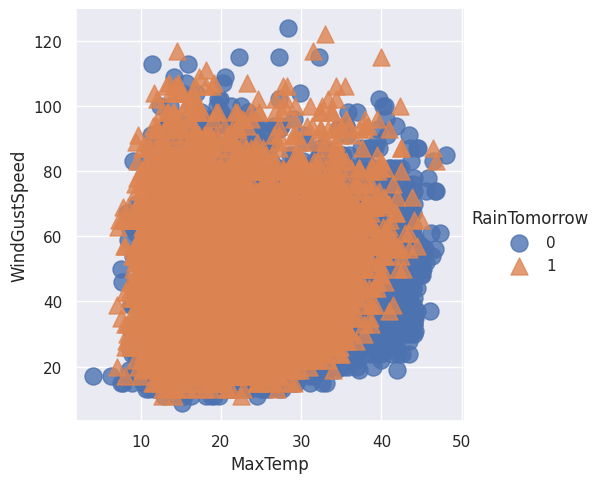

In [23]:
sns.lmplot(x='MaxTemp',y='WindGustSpeed',data = train,fit_reg = False,
           scatter_kws={'s':150},
           hue = 'RainTomorrow',
           markers = ['o','^'])
plt.show()

- 그래프만 보면 분류용 모델로 적합하지 않은 것같다

# 모델 학습
- 트레이닝,테스트 데이터 분리

In [37]:
df = train.drop('RainTomorrow',axis=1)
target = train['RainTomorrow']

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.2,stratify=target)

In [39]:
# 데이터 단위가 서로 자기주장하고 난리났으니 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scale = ss.fit_transform(x_train)
test_scale = ss.transform(x_test)

## 모델 불러오기

In [27]:
# KN 최근접이웃
from sklearn.neighbors import KNeighborsClassifier

for i in range(3,50,2):
  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(train_scale,y_train)

  tr = kn.score(train_scale,y_train)
  te = kn.score(test_scale,y_test)
  if tr-te <= 0.02:
    print(f'k:{i}, tr: {tr}, te : {te}')

k:11, tr: 0.869461183977313, te : 0.8500531726338177
k:13, tr: 0.866913328606877, te : 0.8530662885501595
k:15, tr: 0.8657390996100673, te : 0.8515597305919886
k:17, tr: 0.8637894363700815, te : 0.8510280042538108
k:19, tr: 0.8621056362991847, te : 0.8509393831974477
k:21, tr: 0.8608206309819213, te : 0.8526231832683445
k:23, tr: 0.8597571783055654, te : 0.8512938674228997
k:25, tr: 0.8594248493442042, te : 0.8528004253810706
k:27, tr: 0.858826657213754, te : 0.8533321517192485
k:29, tr: 0.8582063098192131, te : 0.8524459411556186
k:31, tr: 0.8582949308755761, te : 0.8520028358738037
k:33, tr: 0.8573200992555832, te : 0.8525345622119815
k:35, tr: 0.8578296703296703, te : 0.8528890464374336
k:37, tr: 0.8574308755760369, te : 0.8523573200992556
k:39, tr: 0.8571650124069479, te : 0.8520914569301666
k:41, tr: 0.8566554413328606, te : 0.8512938674228997
k:43, tr: 0.8564338886919532, te : 0.8514711095356257
k:45, tr: 0.8557249202410493, te : 0.8509393831974477
k:47, tr: 0.8553482807515066, t

In [28]:
kn = KNeighborsClassifier(n_neighbors=27)
kn.fit(train_scale,y_train)
pred = kn.predict(test_scale)
compare = pd.DataFrame({'prediction':pred,'Actual':y_test})
compare.value_counts()

prediction  Actual
0           0         8415
            1         1271
1           1         1214
            0          384
dtype: int64

- kn의 경우 대체적으로 과소적합인 경향을 보인다
- 이웃수는 27개가 양쪽 모두 점수도 높으며 차이도 적은 편이다

In [29]:
# 로지스틱
from sklearn.linear_model import LogisticRegression

for i in np.arange(0.1, 10.0, 0.3):
  lr = LogisticRegression(C=i)
  lr.fit(train_scale,y_train)

  tr = lr.score(train_scale,y_train)
  te = lr.score(test_scale,y_test)
  if tr-te <= 0.02:
    print(f'c:{i}, tr: {tr}, te : {te}')

c:0.1, tr: 0.8535758596242468, te : 0.8522686990428926
c:0.4, tr: 0.853642325416519, te : 0.8523573200992556
c:0.7000000000000001, tr: 0.8536201701524282, te : 0.8524459411556186
c:1.0000000000000002, tr: 0.8536201701524282, te : 0.8524459411556186
c:1.3000000000000003, tr: 0.853642325416519, te : 0.8524459411556186
c:1.6000000000000003, tr: 0.853642325416519, te : 0.8523573200992556
c:1.9000000000000004, tr: 0.853642325416519, te : 0.8522686990428926
c:2.2000000000000006, tr: 0.853642325416519, te : 0.8522686990428926
c:2.5000000000000004, tr: 0.8536201701524282, te : 0.8522686990428926
c:2.8000000000000003, tr: 0.8536201701524282, te : 0.8521800779865296
c:3.1000000000000005, tr: 0.8536201701524282, te : 0.8521800779865296
c:3.400000000000001, tr: 0.8536201701524282, te : 0.8522686990428926
c:3.7000000000000006, tr: 0.853642325416519, te : 0.8522686990428926
c:4.0, tr: 0.8536644806806097, te : 0.8522686990428926
c:4.300000000000001, tr: 0.853642325416519, te : 0.8522686990428926
c:4.

In [30]:
lr = LogisticRegression(C=1)
lr.fit(train_scale,y_train)
pred = lr.predict(test_scale)
compare = pd.DataFrame({'prediction':pred,'Actual':y_test})
compare.value_counts()

prediction  Actual
0           0         8295
1           1         1324
0           1         1161
1           0          504
dtype: int64

- 로지스틱의 경우 규제가 작든 크든 대체적으로 비슷한 수치를 보인다

In [31]:
# 의사결정트리
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=10)
dt.fit(train_scale,y_train)

tr = dt.score(train_scale,y_train)
te = dt.score(test_scale,y_test)
print(f'k:{i}, tr: {tr}, te : {te}')

k:9.700000000000001, tr: 0.8989498404820986, te : 0.8249734136830911


In [32]:
dt = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=10)
dt.fit(train_scale,y_train)
pred = dt.predict(test_scale)
compare = pd.DataFrame({'prediction':pred,'Actual':y_test})
compare.value_counts()

prediction  Actual
0           0         7954
1           1         1361
0           1         1124
1           0          845
dtype: int64

- 의사결정 트리의 훈련 점수가 가장 높게 나왔으나 테스트 데이터의 상대 점수가 낮게 나온편이다

In [33]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

for i in range(3,50,2):
  rf = RandomForestClassifier(min_samples_split=30,max_depth=i)
  rf.fit(train_scale,y_train)

  tr = rf.score(train_scale,y_train)
  te = rf.score(test_scale,y_test)
  if tr-te <= 0.02:
    print(f'max_depth:{i}, tr: {tr}, te : {te}')

max_depth:3, tr: 0.8383330379298122, te : 0.8373803615739099
max_depth:5, tr: 0.8486795462601914, te : 0.8464197093229351
max_depth:7, tr: 0.8569213045019497, te : 0.8515597305919886
max_depth:9, tr: 0.8692396313364056, te : 0.8566997518610422


In [34]:
rf = RandomForestClassifier(min_samples_split=30,max_depth=9)
rf.fit(train_scale,y_train)
pred = rf.predict(test_scale)
compare = pd.DataFrame({'prediction':pred,'Actual':y_test})
compare.value_counts()

prediction  Actual
0           0         8438
            1         1266
1           1         1219
            0          361
dtype: int64

- 랜덤 포레스트는 점수가 가장 균형있게 나왔으나 다소 아쉬운 점수라고 할 수 있다

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

clf = SVC()
clf.fit(train_scale, y_train)

pred = clf.predict(test_scale)
print(classification_report(y_test, pred))
print('Accuracy : ', accuracy_score(y_test, pred))
print('train_score:',clf.score(train_scale,y_train))
print('test_score:',clf.score(test_scale,y_test))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      8799
           1       0.79      0.51      0.62      2485

    accuracy                           0.86     11284
   macro avg       0.83      0.74      0.77     11284
weighted avg       0.86      0.86      0.85     11284

Accuracy :  0.8627259836937257
train_score: 0.8641217653314428
test_score: 0.8627259836937257


In [31]:
def svc_param_selection(x_train, y_train):
    svm_params = [
        {'kernel': ['rbf'],
                  'gamma' : [0.01, 0.1, 1],
                  'C' : [0.1, 1, 10]}
    ]

    clf = GridSearchCV(SVC(), svm_params)
    clf.fit(x_train, y_train)
    print(clf.best_params_)

    return clf

In [37]:
clf = svc_param_selection(train_scale, y_train)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [38]:
tr = clf.score(train_scale,y_train)
te = clf.score(test_scale,y_test)
print(f'tr: {tr}, te : {te}')

tr: 0.8717210209145693, te : 0.8640552995391705


In [39]:
clf = SVC(C=1,gamma=0.1,kernel='rbf')
clf.fit(train_scale,y_train)
pred = clf.predict(test_scale)
compare = pd.DataFrame({'prediction':pred,'Actual':y_test})
compare.value_counts()

prediction  Actual
0           0         8447
1           1         1303
0           1         1182
1           0          352
dtype: int64

- SVC 모델도 그 수치는 낮다고 할 수 있으나 다른 모델에 비하면 높은 편

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_over, y_train_over, = smote.fit_resample(train_scale,y_train)
x_test_over, y_test_over, = smote.fit_resample(test_scale,y_test)
print('SMOTE 적용전 학습데이터/타깃 데이터 세트 :', x_train.shape,y_train.shape)
print('SMOTE 적용후 학습데이터/타깃 데이터 세트 :', x_train_over.shape,y_train_over.shape)

SMOTE 적용전 학습데이터/타깃 데이터 세트 : (45136, 21) (45136,)
SMOTE 적용후 학습데이터/타깃 데이터 세트 : (70388, 21) (70388,)


In [41]:
clf = SVC(C=1,gamma=0.1,kernel='rbf')
clf.fit(x_train_over,y_train_over)
tr = clf.score(x_train_over,y_train_over)
te = clf.score(x_test_over, y_test_over)
print(f'tr: {tr}, te : {te}')
pred = clf.predict(test_scale)
compare = pd.DataFrame({'prediction':pred,'Actual':y_test})
compare.value_counts()

tr: 0.8513525032676025, te : 0.8226503011705876


prediction  Actual
0           0         7229
1           1         1963
            0         1570
0           1          522
dtype: int64

- 오버샘플링을 통해 타겟값을 같은 비율로 맞추었음에도 기존과 비슷한 수치를보인다

In [42]:
# SGD
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss',random_state=42)

train_score = []
test_score = []

# partial_fit()만 사용하려면 훈련 세트의 전체 클래스의 레이블이 전달되어야 함
classes = np.unique(y_train)
for _ in range(0,300):
  sc.partial_fit(train_scale,y_train,classes=classes)
  train_score.append(sc.score(train_scale,y_train))
  test_score.append(sc.score(test_scale,y_test))

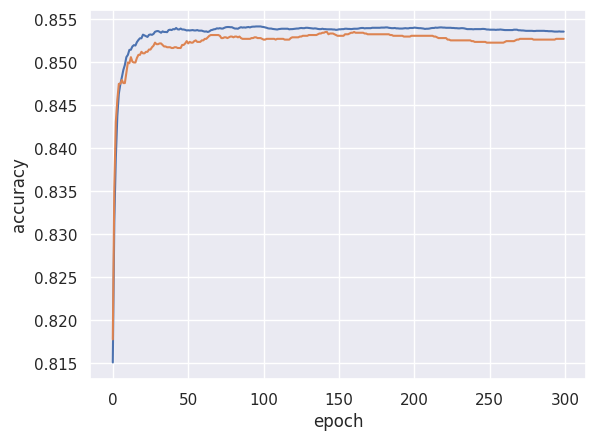

In [43]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [44]:
sc = SGDClassifier(loss = 'hinge',max_iter=100,random_state=42,
                   alpha=0.01,penalty='l2')
sc.fit(train_scale,y_train)

print(sc.score(train_scale,y_train))
print(sc.score(test_scale,y_test))
pred = sc.predict(test_scale)
compare = pd.DataFrame({'prediction':pred,'Actual':y_test})
compare.value_counts()

0.8528004253810706
0.8507621410847217


prediction  Actual
0           0         8404
            1         1289
1           1         1196
            0          395
dtype: int64

- SGD를 통해 최적의 에포크를 알아보았으나 역시 다른 모델과 비슷한 점수를 보인다

# 결론

- 여러 방법을 시도했으나 대체적으로 85프로의 정확도를 보여준다
- 이는 데이터 셋이나 분석 방법의 문제라기 보다, 비가 오는 예상치 못한 요인이 더 있다고 생각할 수 있다
<img src = "https://thumb.zumst.com/530x0/https://static.news.zumst.com/images/43/2019/02/25/4f85b562429e471bb88c81e9f914c55b.jpg" height = 300 width = 300>
- 다만 전문가인 통계청조차 평균 91프로의 정확도를 가졌으므로 적은 데이터로 이정도 정확도를 가졌음에 의의를 가져야한다

In [59]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,init='k-means++',max_iter=50,random_state=0)
model.fit(x_test)



KMeans(max_iter=50, n_clusters=2, random_state=0)

In [60]:
a = model.labels_

In [61]:
compare = pd.DataFrame({'prediction':a,'Actual':y_test})
compare.value_counts()

prediction  Actual
0           0         4833
1           0         3966
0           1         2159
1           1          326
dtype: int64